## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 26.4%
RAM Usage: 8.3%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Network coverage: 100.0% of regions
Network sizes: [113, 113, 113, 116]
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: jvjutfxz
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/jvjutfxz
Initialized sweep with ID: jvjutfxz
1
3
4


wandb: Agent Starting Run: p1p6dpai with config:
wandb: 	batch_size: 512
wandb: 	binarize: False
wandb: 	dropout_rate: 0
wandb: 	epochs: 125
wandb: 	hidden_dims: [256, 128]
wandb: 	input_dim: 14760
wandb: 	learning_rate: 9e-05
wandb: 	weight_decay: 0
ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Processing inner fold 0


/ext3/miniconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Number of learnable parameters in MLP: 3812609
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.01 GB
Best val loss so far at epoch 1: 0.0607
Best val loss so far at epoch 3: 0.0584
Best val loss so far at epoch 5: 0.0583
Epoch 5/125, Train Loss: 0.0130, Val Loss: 0.0583, Time: 1.05s
Best val loss so far at epoch 6: 0.0555
Epoch 10/125, Train Loss: 0.0077, Val Loss: 0.0721, Time: 1.12s
Best val loss so far at epoch 15: 0.0396
Epoch 15/125, Train Loss: 0.0058, Val Loss: 0.0396, Time: 1.05s
Epoch 20/125, Train Loss: 0.0049, Val Loss: 0.0475, Time: 1.07s
Epoch 25/125, Train Loss: 0.0042, Val Loss: 0.0399, Time: 1.39s
Epoch 30/125, Train Loss: 0.0036, Val Loss: 0.0412, Time: 1.09s
Epoch 35/125, Train Loss: 0.0035, Val Loss: 0.0487, Time: 1.09s

LR REDUCED: 0.000090 → 0.000027 at Val Loss: 0.048269
Epoch 40/125, Train Loss: 0.0024, Val Loss: 0.0493, Time: 1.01s
Epoch 45/125, Train Loss: 0.0023, Val Loss: 0.0432, Time: 1.08s
Epoch 50/125, Train Loss: 0.0023, Val Loss: 0.

wandb: Agent Starting Run: dj21021p with config:
wandb: 	batch_size: 512
wandb: 	binarize: False
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 125
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 14760
wandb: 	learning_rate: 9e-05
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Processing inner fold 0
Number of learnable parameters in MLP: 7723777
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.09 GB


/ext3/miniconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Best val loss so far at epoch 1: 0.1787
Best val loss so far at epoch 2: 0.1131
Best val loss so far at epoch 3: 0.0802
Best val loss so far at epoch 4: 0.0571
Best val loss so far at epoch 5: 0.0302
Epoch 5/125, Train Loss: 0.0987, Val Loss: 0.0302, Time: 1.09s
Best val loss so far at epoch 7: 0.0247
Best val loss so far at epoch 9: 0.0245
Epoch 10/125, Train Loss: 0.0478, Val Loss: 0.0281, Time: 1.06s
Best val loss so far at epoch 13: 0.0223
Best val loss so far at epoch 15: 0.0189
Epoch 15/125, Train Loss: 0.0282, Val Loss: 0.0189, Time: 1.15s
Epoch 20/125, Train Loss: 0.0191, Val Loss: 0.0196, Time: 1.05s
Best val loss so far at epoch 25: 0.0188
Epoch 25/125, Train Loss: 0.0145, Val Loss: 0.0188, Time: 1.02s
Best val loss so far at epoch 26: 0.0185
Epoch 30/125, Train Loss: 0.0118, Val Loss: 0.0189, Time: 1.06s
Best val loss so far at epoch 32: 0.0182
Epoch 35/125, Train Loss: 0.0102, Val Loss: 0.0195, Time: 1.13s

LR REDUCED: 0.000090 → 0.000027 at Val Loss: 0.021462
Epoch 40/125,

wandb: Agent Starting Run: mnn7kcqh with config:
wandb: 	batch_size: 512
wandb: 	binarize: False
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 14760
wandb: 	learning_rate: 9e-05
wandb: 	weight_decay: 1e-05
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Processing inner fold 0


/ext3/miniconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Number of learnable parameters in MLP: 7723777
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.09 GB
Best val loss so far at epoch 1: 0.0767
Best val loss so far at epoch 2: 0.0538
Best val loss so far at epoch 3: 0.0388
Epoch 5/100, Train Loss: 0.0540, Val Loss: 0.0497, Time: 1.00s
Best val loss so far at epoch 7: 0.0332
Best val loss so far at epoch 8: 0.0282
Best val loss so far at epoch 9: 0.0260
Best val loss so far at epoch 10: 0.0255
Epoch 10/100, Train Loss: 0.0330, Val Loss: 0.0255, Time: 1.08s
Best val loss so far at epoch 13: 0.0204
Epoch 15/100, Train Loss: 0.0213, Val Loss: 0.0258, Time: 1.15s
Epoch 20/100, Train Loss: 0.0144, Val Loss: 0.0216, Time: 1.08s
Best val loss so far at epoch 21: 0.0201
Best val loss so far at epoch 23: 0.0195
Epoch 25/100, Train Loss: 0.0103, Val Loss: 0.0247, Time: 1.33s
Best val loss so far at epoch 28: 0.0186
Epoch 30/100, Train Loss: 0.0080, Val Loss: 0.0245, Time: 1.13s
Epoch 35/100, Train Loss: 0.0064, Val Loss: 0.018

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zykb1w1l with config:
wandb: 	batch_size: 512
wandb: 	binarize: False
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 125
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 14760
wandb: 	learning_rate: 9e-05
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Processing inner fold 0


/ext3/miniconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Number of learnable parameters in MLP: 7723777
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.09 GB
Best val loss so far at epoch 1: 0.3754
Best val loss so far at epoch 2: 0.0573
Best val loss so far at epoch 4: 0.0342
Epoch 5/125, Train Loss: 0.0420, Val Loss: 0.0385, Time: 1.05s
Best val loss so far at epoch 6: 0.0302
Epoch 10/125, Train Loss: 0.0258, Val Loss: 0.0491, Time: 1.05s
Best val loss so far at epoch 13: 0.0286
Best val loss so far at epoch 15: 0.0281
Epoch 15/125, Train Loss: 0.0171, Val Loss: 0.0281, Time: 1.07s
Best val loss so far at epoch 16: 0.0235
Epoch 20/125, Train Loss: 0.0126, Val Loss: 0.0380, Time: 1.01s
Epoch 25/125, Train Loss: 0.0095, Val Loss: 0.0314, Time: 1.11s
Best val loss so far at epoch 28: 0.0212
Epoch 30/125, Train Loss: 0.0073, Val Loss: 0.0297, Time: 1.03s
Best val loss so far at epoch 32: 0.0203
Best val loss so far at epoch 33: 0.0199
Epoch 35/125, Train Loss: 0.0060, Val Loss: 0.0300, Time: 1.42s
Epoch 40/125, Train Loss

wandb: Sorting runs by +summary_metrics.mean_val_loss
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


BEST CONFIG {'epochs': 125, 'binarize': False, 'input_dim': 14760, 'batch_size': 512, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.3, 'weight_decay': 0, 'learning_rate': 9e-05}
Number of learnable parameters in MLP: 7723777


Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.09 GB
Best val loss so far at epoch 1: 0.0659
Best val loss so far at epoch 3: 0.0659
Best val loss so far at epoch 5: 0.0617
Epoch 5/125, Train Loss: 0.0410, Val Loss: 0.0617, Time: 3.24s
Best val loss so far at epoch 6: 0.0561
Best val loss so far at epoch 9: 0.0511
Best val loss so far at epoch 10: 0.0493
Epoch 10/125, Train Loss: 0.0151, Val Loss: 0.0493, Time: 3.05s
Best val loss so far at epoch 11: 0.0423
Best val loss so far at epoch 12: 0.0403
Epoch 15/125, Train Loss: 0.0100, Val Loss: 0.0478, Time: 2.88s
Best val loss so far at epoch 16: 0.0332
Best val loss so far at epoch 17: 0.0320
Epoch 20/125, Train Loss: 0.0081, Val Loss: 0.0406, Time: 3.66s
Best val loss so far at epoch 23: 0.0308
Epoch 25/125, Train Loss: 0.0070, Val Loss: 0.0365, Time: 2.99s
Best val loss so far at epoch 30: 0.0302
Epoch 30/125, Train Loss: 0.0062, Val Loss: 0.0302, Time: 2.66s
Epoch 35/125, Train Loss: 0.0058, Val Loss: 0.0328, Ti

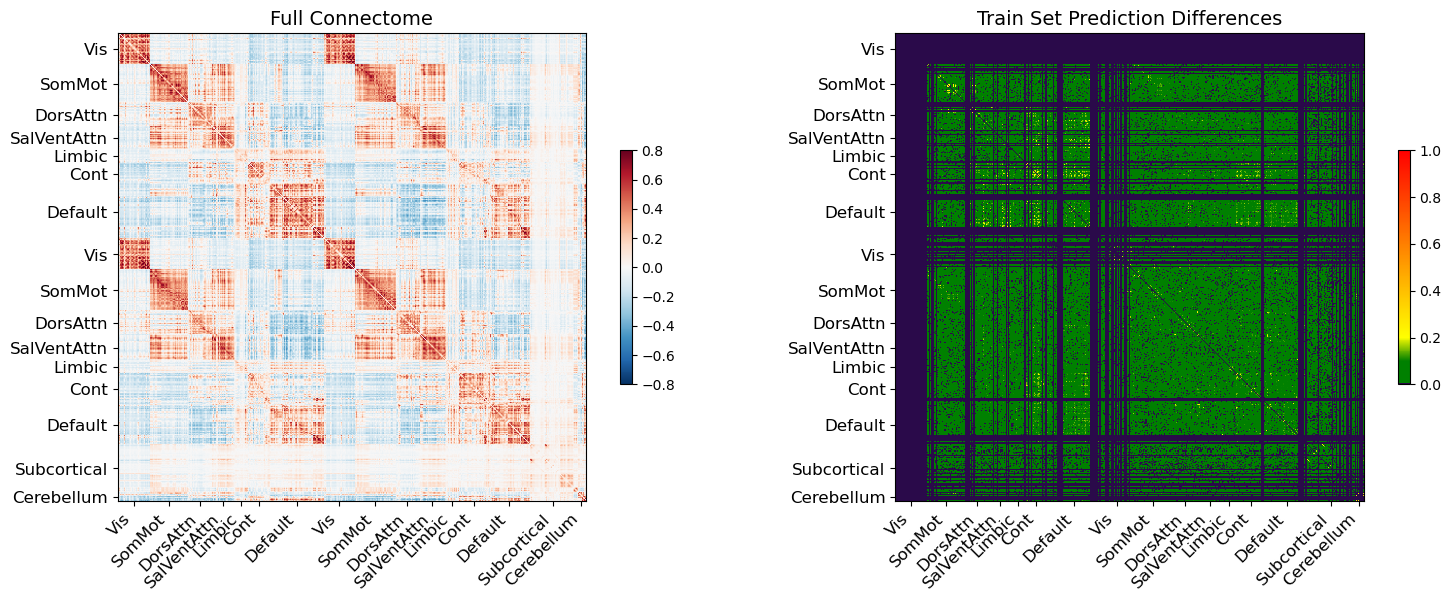

<Figure size 640x480 with 0 Axes>

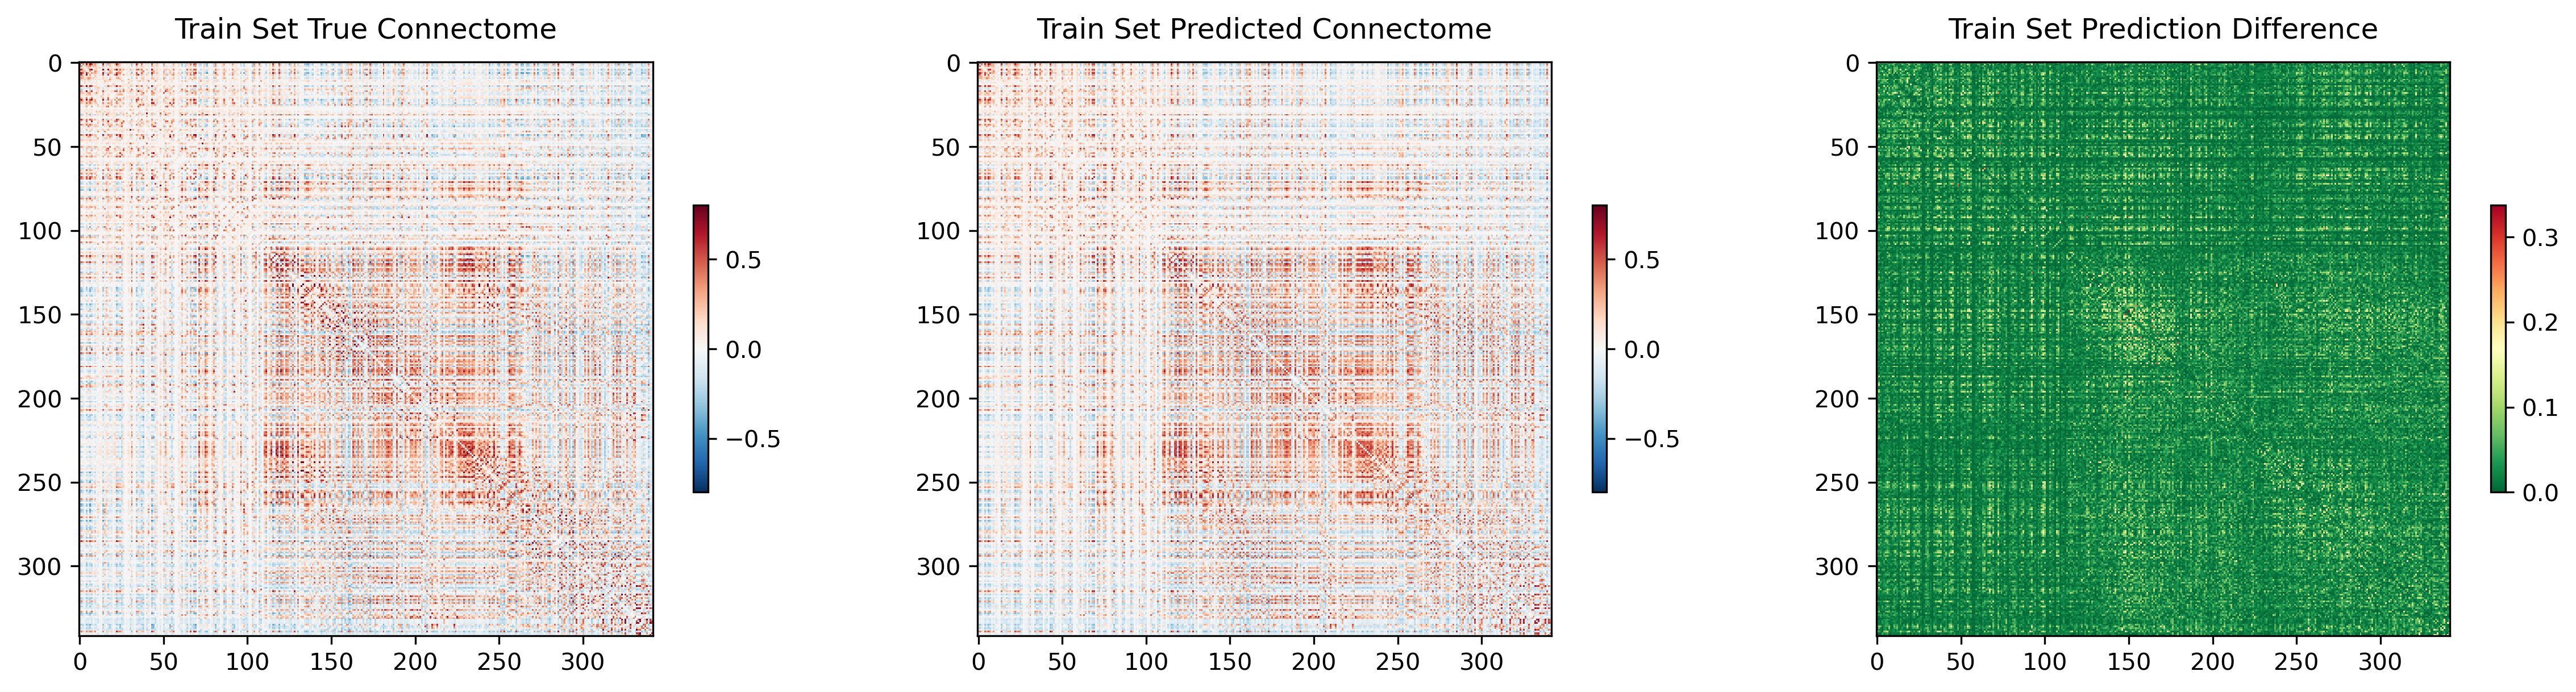

<Figure size 640x480 with 0 Axes>

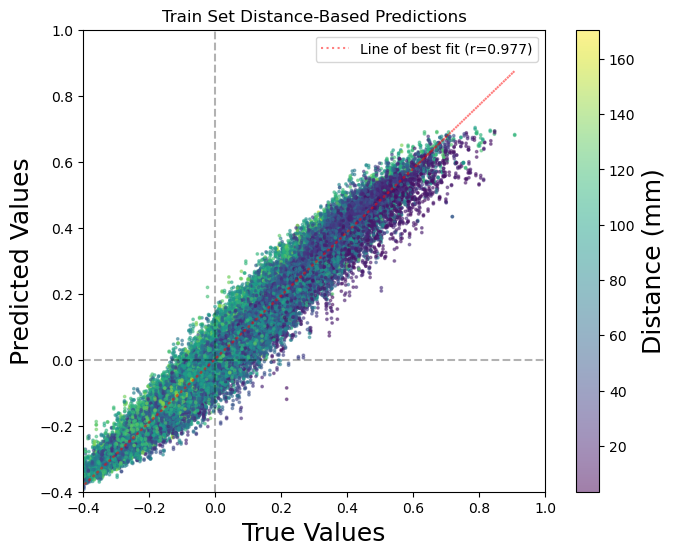

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 113 regions, 12656 connections


<Figure size 640x480 with 0 Axes>

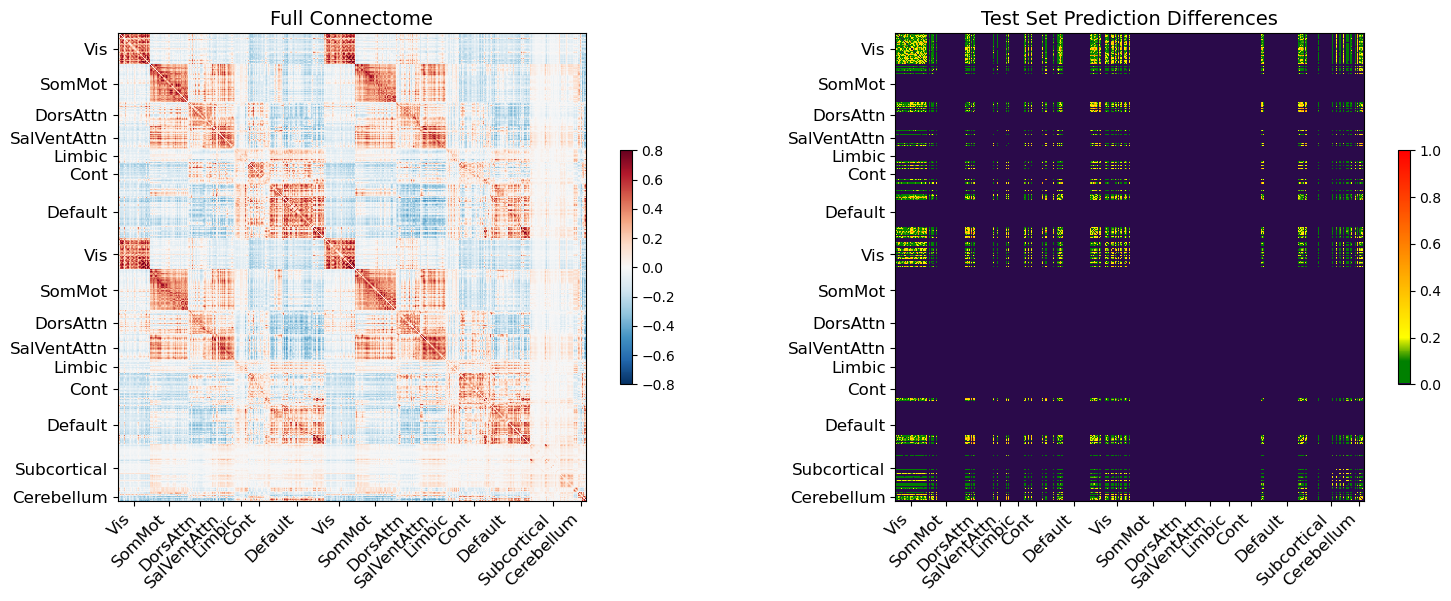

<Figure size 640x480 with 0 Axes>

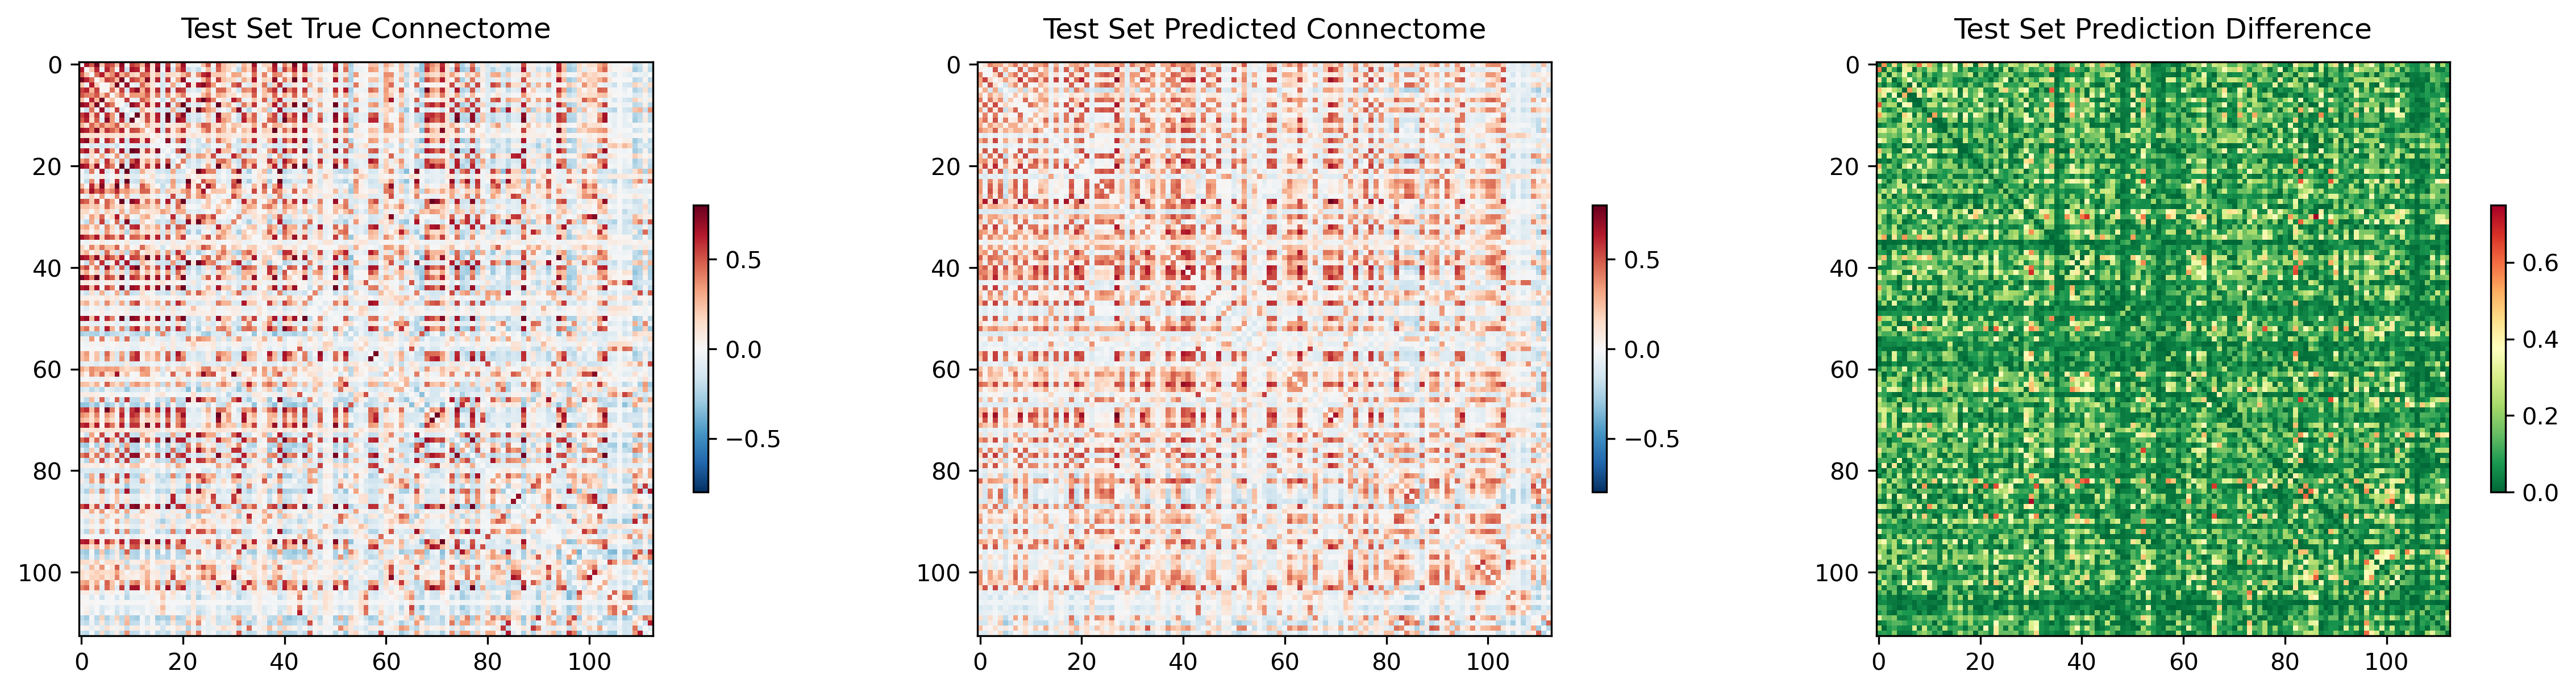

<Figure size 640x480 with 0 Axes>

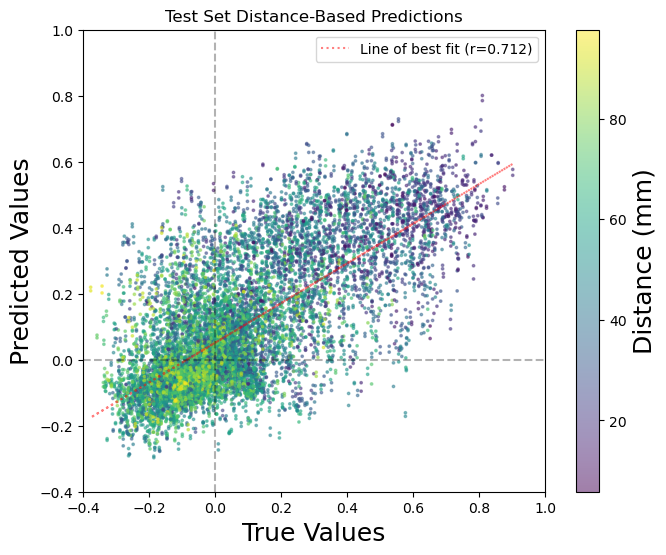

TRAIN METRICS
GLOBAL: mse=0.001586, mae=0.028347, r2=0.9537, pearson_r=0.9766, spearman_r=0.9720, geodesic_distance=14.4022
DISTANCE-BASED: short=0.9771, mid=0.9757, long=0.9739
HEMISPHERIC: left=0.9757, right=0.9832, inter=0.9796
CONNECTION STRENGTH: neg=0.6636, weak=0.9601, pos=0.8248
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9585    0.9643
  Default       0.9678    0.9662
  SalVentAttn    0.9641    0.9644
  Limbic        0.9810    0.9746
  DorsAttn      0.9673    0.9664
  SomMot        0.9635    0.9662
  Vis           0.8539    0.9622
  Subcortical    0.9649    0.9654
  Cerebellum    0.9967    0.9660

TEST METRICS
GLOBAL: mse=0.029661, mae=0.127401, r2=0.4809, pearson_r=0.7119, spearman_r=0.6554, geodesic_distance=11.1585
DISTANCE-BASED: short=0.7148, mid=0.5899
HEMISPHERIC: left=0.6951, right=0.8295, inter=0.7069
CONNECTION STRENGTH: weak=0.4989, pos=0.3399
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  -------

Final evaluation metrics logged successfully.
CPU Usage: 27.6%
RAM Usage: 9.9%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 753.94 seconds (12.57 minutes)


0

<Figure size 640x480 with 0 Axes>

In [8]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='spatial',
              random_seed=2,
              search_method=('wandb', 'mse', 4),
              track_wandb=True,
              skip_cv=False,
              model_type='dynamic_mlp',
              use_gpu=True, 
              null_model='none',
              use_folds=[1]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()